# News Mood

* Observation 1
* Observation 2
* Observation 3

In [ ]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Setting up Tweepy Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

analyzer = SentimentIntensityAnalyzer()
targets = ['@BBCWorld', '@CNN', '@CBSNews', '@FoxNews', '@NYTimes']

tweets = []

for user in targets:
    counter = 1
    public_tweets = api.user_timeline(user, count = 100)
    for tweet in public_tweets:
        tweets.append({
            "User" : user,
            "Date" : tweet['created_at'],
            "Compound Score" : analyzer.polarity_scores(tweet['text'])["compound"],
            "Positive Score" : analyzer.polarity_scores(tweet['text'])["pos"], 
            "Neutral Score" : analyzer.polarity_scores(tweet['text'])["neu"],
            "Negative Score" : analyzer.polarity_scores(tweet['text'])["neg"],       
            "Text" : tweet['text'],
            "Tweets Ago": counter,
        })
        counter += 1

tweets_df = pd.DataFrame.from_dict(tweets)
tweets_df.to_csv("tweets")
tweets_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text,Tweets Ago,User
0,0.0000,Thu Jun 14 23:05:04 +0000 2018,0.000,1.000,0.000,Boris Becker claims diplomatic immunity in ban...,1,@BBCWorld
1,-0.7650,Thu Jun 14 22:26:37 +0000 2018,0.452,0.548,0.000,Banksy print stolen from Toronto exhibit by br...,2,@BBCWorld
2,-0.7650,Thu Jun 14 22:23:52 +0000 2018,0.423,0.577,0.000,Turkey election: Three dead in clash as pre-po...,3,@BBCWorld
3,0.0000,Thu Jun 14 21:54:22 +0000 2018,0.000,1.000,0.000,Ex-Walmart now a shelter for child migrants ht...,4,@BBCWorld
4,-0.3716,Thu Jun 14 21:01:51 +0000 2018,0.220,0.653,0.128,They survived the Ice Age but today saiga ante...,5,@BBCWorld


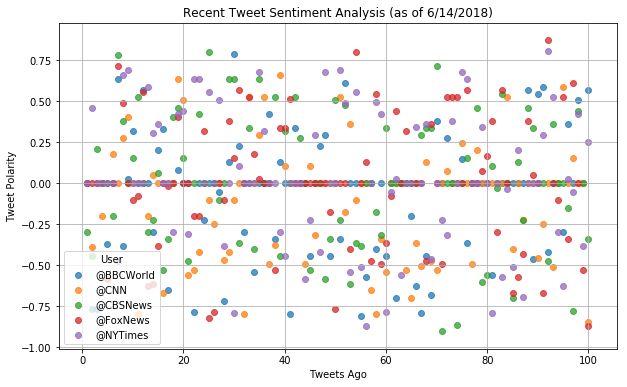

In [3]:
plt.figure(figsize=(10,6))
for target in targets:
    specific = tweets_df.loc[tweets_df["User"] == target]
    plt.scatter(specific['Tweets Ago'], specific['Compound Score'], alpha=0.75, label = target)


plt.title("Recent Tweet Sentiment Analysis (as of 6/14/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(title="User")
plt.savefig("RecentAnalysis")
plt.grid()

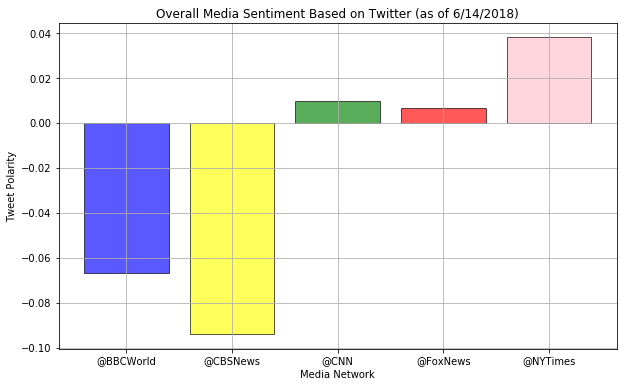

In [4]:
new_df = tweets_df.groupby('User')
test = pd.DataFrame(new_df['Compound Score'].mean())

plt.figure(figsize=(10,6))
plt.bar([target for target in targets], test['Compound Score'], color=['blue', 'green', 'yellow', 'red', 'pink'], alpha=0.65,\
        edgecolor='black')

plt.title("Overall Media Sentiment Based on Twitter (as of 6/14/2018)")
plt.xlabel("Media Network")
plt.ylabel("Tweet Polarity")
plt.savefig("OverallSentiment")
plt.grid()